In [16]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline

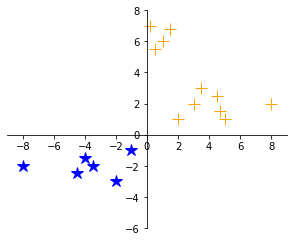

In [17]:
x1p=np.array([2,3,3.5,4.5,4.7,5,8,1,0.5,0.2,1.5])
x2p=np.array([1, 2,3,2.5,1.5,1,2,6,5.5,7,6.8])
xp=np.array([x1p,x2p])
xp=np.transpose(xp)
yp=np.ones(np.shape(x1p)[0])

x1m=np.array([-1,-2,-3.5,-4,-4.5,-8])
x2m=np.array([-1,-3,-2,-1.5,-2.5,-2])
xm=np.array([x1m,x2m])
xm=np.transpose(xm)
ym=-np.ones(np.shape(x1m)[0])

vx=np.concatenate((xm,xp))
vy=np.concatenate((ym,yp))

fig,ax=plt.subplots()
ax.plot(x1p,x2p,color='orange', marker='+', linestyle='none', linewidth=2, markersize=12)
ax.plot(x1m,x2m,color='blue', marker='*', linestyle='none', linewidth=2, markersize=12)

# set the x-spine (see below for more info on `set_position`)
ax.spines['left'].set_position('zero')
# turn off the right spine/ticks
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
# set the y-spine
ax.spines['bottom'].set_position('zero')
# turn off the top spine/ticks
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()

ax.set_aspect('equal')
ax.axis([-9,9,-6,8])

plt.show()

In [18]:
print(xm)

[[-1.  -1. ]
 [-2.  -3. ]
 [-3.5 -2. ]
 [-4.  -1.5]
 [-4.5 -2.5]
 [-8.  -2. ]]


## Nearest neighbour

In [19]:
# define the distance/similarity function
def dist(s,t):
    return np.sqrt(sum((s-t)*(s-t)))

In [22]:
# find the nearest neighbour for a testing point
xt= np.array([-1,-1]) # set the testing point
N=np.shape(vx)[0]
dt=np.zeros(N)
for i in range(N):
    dt[i]=dist(xt,vx[i,:])
k=np.argmin(dt)
yt=vy[k]
print(yt)

-1.0


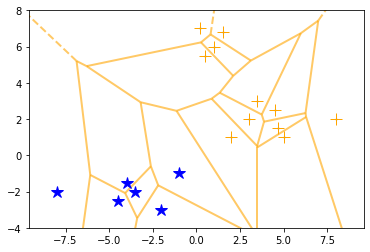

In [23]:
import matplotlib as mpl
import matplotlib.cm as cm
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(vx)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',line_width=2, line_alpha=0.6, point_size=2)
plt.plot(x1p,x2p,color='orange', marker='+', linestyle='none', linewidth=2, markersize=12)
plt.plot(x1m,x2m,color='blue', marker='*', linestyle='none', linewidth=2, markersize=12)

plt.show()

# # find min/max values for normalization
# minima = min(vy)
# maxima = max(vy)

# # normalize chosen colormap
# norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
# mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

# # plot Voronoi diagram, and fill finite regions with color mapped from speed value
# voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)
# for r in range(len(vor.point_region)):
#     region = vor.regions[vor.point_region[r]]
#     if not -1 in region:
#         polygon = [vor.vertices[i] for i in region]
#         plt.fill(*zip(*polygon), color=mapper.to_rgba(vy[r]))
# plt.show()

### KNN: k-nearest neighbours

use argsort instead of argmin

In [ ]:
np.argsort(dt)[:3]